In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import os
import csv

def calculate_text_size(text, font):
    # calculate text size based on font properties
    ascent, descent = font.getmetrics()
    text_width = font.getmask(text).getbbox()[2]
    text_height = ascent + descent
    return text_width, text_height

def get_brightness(color):
    # Calculate brightness of a color (grayscale value) for the text
    r, g, b = ImageColor.getrgb(color)
    return (r * 299 + g * 587 + b * 114) / 1000 


def visualize_image(filename, csv_filename):
        # Open image
        image_path = filename
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Read bounding box information from CSV file
        if os.path.getsize(csv_filename) > 0:
            with open(csv_filename, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                #next(csvreader)  # Skip header row
                for row in csvreader:
                    if row:
                        xmin, ymin, xmax, ymax = map(int, row[0:4])
                        class_name = row[4]
        
                        # Define colors for different classes
                        class_colors = {
                            'danger': 'yellow',
                            'interdiction': 'purple',
                            'obligation': 'blue',
                            'stop': 'magenta',
                            'ceder': 'cyan',
                            'frouge': 'red',
                            'forange': 'orange',
                            'fvert': 'green'
                        }
        
                         # Define brightness threshold for determining text color
                        brightness_threshold = 150  
        
                        # Get bounding box color
                        box_color = class_colors.get(class_name, 'white') #white is the de
        
                        # Determine text color based on brightness of box color
                        text_color = 'black' if get_brightness(box_color) > brightness_threshold else 'white'
        
                        # Draw bounding box
                        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline=box_color)
        
                        # Define font and size
                        font_size = 30 # Adjust the font size here
                        font = ImageFont.truetype("arial.ttf", font_size)
        
                        # Get text size
                        text_width, text_height = calculate_text_size(class_name, font)
        
                        # Draw filled rectangle as background for class name
                        draw.rectangle([(xmin, ymin - text_height), (xmin + text_width, ymin)], fill=box_color)
        
                        # Draw class name text on top of the filled rectangle
                        draw.text((xmin, ymin - text_height), class_name, fill=text_color, font=font)
        return img

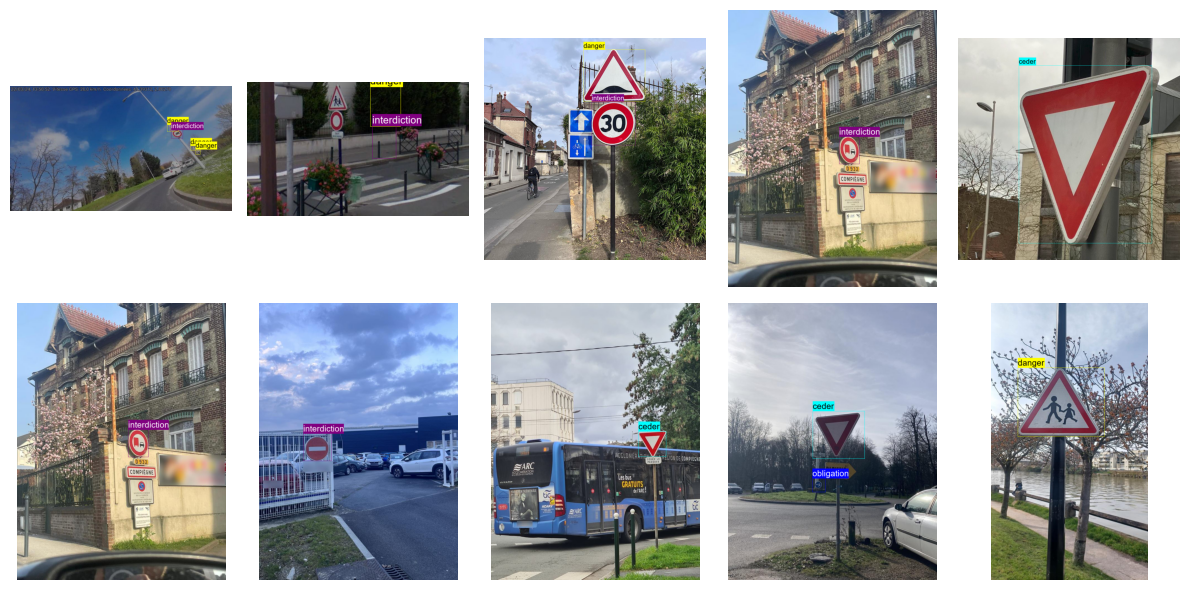

In [2]:
import os
import random
import matplotlib.pyplot as plt


# Affiche au hasard des images positives de l'ensemble d'apprentissage
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for ax in axs.ravel():
    images_dir = os.path.join("train", "images")
    labels_dir = os.path.join("train", "labels")
    image_name = random.choice(os.listdir(images_dir))
    image_path = os.path.join(images_dir, image_name)
    csv_path = os.path.join(labels_dir, image_name[:-4] + ".csv")   
    # Call visualize_image function to modify the image
    image_to_display = visualize_image(image_path, csv_path)
    
    # Display the modified image
    ax.imshow(image_to_display)
    ax.axis('off')
        
plt.tight_layout()
plt.show()


In [3]:
import os
import csv

def compter_panneaux(images_path, labels_path):
    # Dictionnaire pour compter les panneaux
    panneaux_count = {}

    # Liste des fichiers images
    image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

    # Parcourir chaque image
    for image_file in image_files:
        # Obtenir le nom de base sans l'extension
        base_name = os.path.splitext(image_file)[0]
        
        # Chemin vers le fichier label correspondant
        label_file = os.path.join(labels_path, base_name + '.csv')
        
        # Vérifier si le fichier label existe et n'est pas vide
        if os.path.exists(label_file) and os.path.getsize(label_file) > 0:
            # Lire le fichier CSV
            with open(label_file, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                # Parcourir chaque ligne du fichier CSV
                for row in csvreader:
                    if len(row) >= 5:  # Vérifier que la ligne a au moins 5 colonnes
                        # Supposons que la classe du panneau est dans la 5ème colonne (index 4)
                        class_name = row[4]
                        if class_name in panneaux_count:
                            panneaux_count[class_name] += 1
                        else:
                            panneaux_count[class_name] = 1

    # Afficher le résultat
    for panneau, count in panneaux_count.items():
        print(f"Nombre de panneaux '{panneau}' : {count}")

# Chemin vers le dossier des images et des labels
images_path = 'train/images'
labels_path = 'train/labels'

# Appeler la fonction
compter_panneaux(images_path, labels_path)

images_path2 = 'train/images2'
labels_path2 = 'train/labels2'

# Appeler la fonction
#compter_panneaux(images_path2, labels_path2)

Nombre de panneaux 'frouge' : 90
Nombre de panneaux 'ceder' : 133
Nombre de panneaux 'interdiction' : 365
Nombre de panneaux 'fvert' : 109
Nombre de panneaux 'stop' : 100
Nombre de panneaux 'obligation' : 108
Nombre de panneaux 'danger' : 162
Nombre de panneaux 'empty' : 47
Nombre de panneaux 'forange' : 67


In [4]:
image_folder = 'train/images'
label_folder = 'train/labels'
new_image_folder = 'train/images2'
new_label_folder = 'train/labels2'
target_labels = ['frouge', 'forange', 'fvert','stop', 'obligation', 'ceder','danger']

# Exécuter le processus
#process_images(image_folder, label_folder, new_image_folder, new_label_folder, target_labels)

In [5]:
import os
import csv



# Chemin vers le dossier des images et des labels
images_path2 = 'train/images2'
labels_path2 = 'train/labels2'

# Appeler la fonction
compter_panneaux(images_path2, labels_path2)

Nombre de panneaux 'frouge' : 153
Nombre de panneaux 'ceder' : 223
Nombre de panneaux 'interdiction' : 365
Nombre de panneaux 'fvert' : 170
Nombre de panneaux 'stop' : 100
Nombre de panneaux 'obligation' : 195
Nombre de panneaux 'danger' : 252
Nombre de panneaux 'empty' : 47
Nombre de panneaux 'forange' : 104


# Classification

In [6]:
import pandas as pd
from skimage import io, color
from skimage.feature import hog
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import numpy as np
from PIL import Image
import os
import joblib

def load_images_and_labels(image_dir, label_dir):
    data = []
    labels = []
    columns = ['x1', 'y1', 'x2', 'y2', 'label']

    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_dir, filename)
            csv_path = os.path.join(label_dir, filename[:-4] + ".csv")
            
            if not os.path.exists(csv_path):
                continue

            image = io.imread(image_path)
            if len(image.shape) > 2:
                image = color.rgb2gray(image)  # Convertir en niveaux de gris pour HOG

            df = pd.read_csv(csv_path, header=None, names=columns)
            for _, row in df.iterrows():
                label = row['label'].strip()
                if label == 'ff':
                    continue  # Ignorer les labels 'ff'
                
                if label == 'empty':
                    # Diviser l'image en 9 sous-images et utiliser chaque sous-image pour les cas 'empty'
                    height, width = image.shape
                    sub_images = [
                        image[:height//3, :width//3],
                        image[:height//3, width//3:2*width//3],
                        image[:height//3, 2*width//3:],
                        image[height//3:2*height//3, :width//3],
                        image[height//3:2*height//3, 2*width//3:],
                        image[2*height//3:, :width//3],
                    ]
                    for sub_image in sub_images:
                        sub_image_resized = Image.fromarray(sub_image).resize((100, 100))
                        hog_features = hog(np.array(sub_image_resized),orientations=16, pixels_per_cell=(8, 8),
                                           cells_per_block=(2, 2), visualize=False, feature_vector=True)
                        data.append(hog_features)
                        labels.append(label)  # Utiliser le label 'empty' pour chaque sous-image
                else:
                    x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
                    if x1 >= x2 or y1 >= y2 or x1 < 0 or y1 < 0 or x2 > image.shape[1] or y2 > image.shape[0]:
                        continue
                    roi = image[y1:y2, x1:x2]
                    if roi.size == 0:
                        continue
                    roi_resized = Image.fromarray(roi).resize((100, 100))  # S'assurer que le redimensionnement est correct
                    roi_array = np.array(roi_resized)
                    hog_features = hog(roi_array,orientations=16, pixels_per_cell=(8, 8),
                                           cells_per_block=(2, 2), visualize=False, feature_vector=True)
                    data.append(hog_features)
                    labels.append(label)  # Utiliser le label spécifique du panneau

    return np.array(data, dtype='float64'), np.array(labels)  # Les labels seront convertis séparément

# Chemins vers les dossiers d'images et de labels
image_dir = 'train/images2'
label_dir = 'train/labels2'

# Charger les données
features, target = load_images_and_labels(image_dir, label_dir)

# Encoder les labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Création et entraînement du SVM avec probability=True
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(features, target_encoded)  # Utiliser les labels encodés
print("Le modèle SVM a été entraîné.")

Le modèle SVM a été entraîné.


In [7]:
labels = label_encoder.classes_
print("Les labels du modèle sont :")
print(labels)

Les labels du modèle sont :
['ceder' 'danger' 'empty' 'forange' 'frouge' 'fvert' 'interdiction'
 'obligation' 'stop']


# Detection de panneaux sur l'image

Detection avec une fenetre plus grande : 200*200

Remarque actuelle : 
Les rectangles verticaux sont performants pour détecter des feux
Les carrés sont perfermants pour détecter des panneaux normaux
Quel compromis ?

A faire : 
Détection de plusieurs panneaux 
Une image peut uniquement contenir un type de feu
Faire translater les carrés poru qu'il recouvre toute l'image

# Technique Ines

In [8]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import defaultdict
from joblib import Parallel, delayed

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à 100x100 pour correspondre au modèle entraîné
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1] + 1, step_size):
        for x in range(0, image.width - window_size[0] + 1, step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection avec une fenêtre de taille fixe
def detect_with_fixed_window(image, win_size, step_size, confidence_threshold, clf, label_encoder):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5, max_layer=4)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
      #  print(f"Taille de l'image à l'échelle {1.5 ** i}: {resized_image.width}x{resized_image.height}")
        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la détection
            detections.append((max_proba, predicted_label, original_x1, original_y1, original_x2, original_y2))
    
    return detections
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si une boîte englobante en englobe une autre
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si deux boîtes englobantes sont trop proches
def are_boxes_too_close(box1, box2, threshold=10):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return abs(x1_1 - x1_2) < threshold and abs(y1_1 - y1_2) < threshold and \
           abs(x2_1 - x2_2) < threshold and abs(y2_1 - y2_2) < threshold

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')

    # Détection avec des carrés 64x64
    detections_64x64 = detect_with_fixed_window(image, (64, 64), 64, confidence_threshold, clf, label_encoder)

    # Stocker les résultats
    bboxes = []
    bboxes_confidences = defaultdict(list)

    for max_proba, predicted_label, x1, y1, x2, y2 in detections_64x64:
        bboxes.append(((x1, y1, x2, y2), predicted_label))
        bboxes_confidences[(x1, y1, x2, y2)].append(max_proba)
    
    # Filtrer les détections avec une confiance supérieure à 65%
    filtered_bboxes = [(bbox, label) for bbox, label in bboxes if max(bboxes_confidences[bbox]) >= 0.65]

    # Filtrer les détections conflictuelles pour les feux de signalisation
    traffic_light_detections = []
    final_bboxes = []
    for bbox, label in filtered_bboxes:
        if label in ['frouge', 'forange', 'fvert']:
            traffic_light_detections.append((bbox, label, max(bboxes_confidences[bbox])))
        else:
            final_bboxes.append((bbox, label))

    if traffic_light_detections:
        # Trouver le type de feu de signalisation avec la plus grande confiance
        best_traffic_light_type = max(traffic_light_detections, key=lambda x: x[2])[1]
        # Conserver seulement les détections de ce type
        filtered_traffic_lights = [detection for detection in traffic_light_detections if detection[1] == best_traffic_light_type]
        for bbox, label, confidence in filtered_traffic_lights:
            final_bboxes.append((bbox, label))

    # Éliminer les boîtes englobantes trop proches ou englobées
    final_bboxes_filtered = []

    for bbox, label in final_bboxes:
        if not any(does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox) for existing_bbox, existing_label in final_bboxes_filtered if existing_label == label):
            final_bboxes_filtered.append((bbox, label))
        else:
            # Trouver et comparer les confiances
            for i, (existing_bbox, existing_label) in enumerate(final_bboxes_filtered):
                if existing_label == label and (does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox)):
                    if max(bboxes_confidences[bbox]) > max(bboxes_confidences[existing_bbox]):
                        final_bboxes_filtered[i] = (bbox, label)
                    break
    
    final_bboxes = final_bboxes_filtered

    # Trouver la boîte avec la plus grande valeur de prédiction
    if final_bboxes:
        best_bbox = max(bboxes_confidences.items(), key=lambda item: max(item[1]))
        best_label = [label for bbox, label in final_bboxes if bbox == best_bbox[0]][0]
        result_phrase = f"L'image contient à priori le panneau {best_label} avec la plus grande valeur de confiance ({max(best_bbox[1]):.2f})."
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    predicted_signs = list(set([label for _, label in final_bboxes]))

    print(result_phrase)
    return predicted_signs, final_bboxes, bboxes_confidences, result_phrase

# Fonction pour générer des phrases de résultat
def generate_result_phrases(final_bboxes, bboxes_confidences):
    result_phrases = []
    for bbox, label in final_bboxes:
        confidences = bboxes_confidences[bbox]
        max_confidence = max(confidences)
        phrase = f"Bounding Box: {bbox}, Label: {label}, Confiance: {max_confidence:.2f}"
        result_phrases.append(phrase)
    return result_phrases

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0317.jpg'
predicted_signs, final_bboxes, bboxes_confidences, result_phrase = detect_signs_in_image(image_path, clf, label_encoder)

# Affichage des résultats
result_phrases = generate_result_phrases(final_bboxes, bboxes_confidences)
for phrase in result_phrases:
    #print(phrase)
    continue

L'image contient à priori le panneau danger avec la plus grande valeur de confiance (0.99).


In [9]:
# Fonction pour afficher les carrés avec leur label sur l'image
def draw_detections(image_path, final_bboxes):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    
    # Couleurs pour différents labels
    colors = {
        'frouge': 'red',
        'forange': 'orange',
        'fvert': 'green',
        'empty': 'grey'
    }

    # Dessiner les détections sur l'image
    for bbox, label in final_bboxes:
        (x1, y1, x2, y2) = bbox
        color = colors.get(label, 'blue')  # Couleur par défaut
        draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
        text_position = (x1, y1 - 10 if y1 - 10 > 10 else y1 + 10)  # Positionner le texte juste au-dessus de la boîte
        draw.text(text_position, label, fill=color)
    
    # Afficher l'image
    image.show()

# Exemple d'utilisation
draw_detections(image_path, final_bboxes)


## Suite :
Essayer de fusionner avec la méthode de détections des formes
Mettre à jour le rapport
Tester sur le dataset val

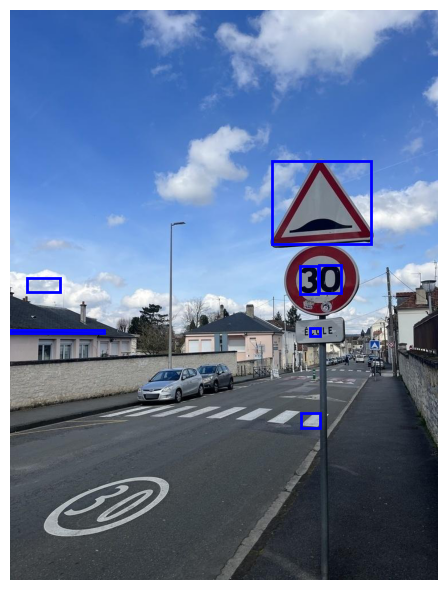

Détails des détections :
interdiction à 99.65%
danger à 99.34%
fvert à 65.14%
Détection terminée
Panneau: danger, Confiance: 99.34%, Coordonnées: (460, 265), (633, 410)
Panneau: interdiction, Confiance: 99.65%, Coordonnées: (542, 447), (580, 496)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, measure, filters, morphology, feature
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from PIL import Image, ImageDraw
import joblib

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à la taille d'entrée pour HOG
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour vérifier si une boîte est complètement contenue dans une autre
def is_contained(inner_box, outer_box):
    ix1, iy1, ix2, iy2 = inner_box
    ox1, oy1, ox2, oy2 = outer_box
    return ix1 >= ox1 and iy1 >= oy1 and ix2 <= ox2 and iy2 <= oy2

# Fonction principale pour détecter les formes et les panneaux dans une image
def detect_and_display_shapes(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = io.imread(image_path)
    image_pil = Image.fromarray(image)
    image_gray = color.rgb2gray(image)

    # Appliquer un seuillage pour binariser l'image
    thresh = filters.threshold_otsu(image_gray)
    bw = morphology.closing(image_gray > thresh, morphology.square(3))

    # Enlever les objets connectés au bord de l'image
    cleared = morphology.remove_small_objects(bw, 20)
    cleared = morphology.remove_small_holes(cleared, 20)

    # Utiliser la détection de contours pour améliorer la détection des formes
    edges = feature.canny(image_gray, sigma=2.0)
    filled_edges = morphology.binary_closing(edges, morphology.square(3))
    label_image = measure.label(filled_edges)

    # Détecter les propriétés des régions
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image)

    all_detections = []

    for region in measure.regionprops(label_image):
        # Sauter les petites régions
        if region.area < 100:
            continue

        # Détecter la boîte englobante
        minr, minc, maxr, maxc = region.bbox
        rect_height = maxr - minr
        rect_width = maxc - minc

        # Préparer les données pour la classification
        box = (minc, minr, maxc, maxr)
        hog_features = prepare_data(image_pil, box)
        probabilities = clf.predict_proba([hog_features])[0]
        max_proba = np.max(probabilities)

        if max_proba >= confidence_threshold:
            prediction = np.argmax(probabilities)
            predicted_label = label_encoder.inverse_transform([prediction])[0]
            if predicted_label != 'empty':
                all_detections.append((max_proba, predicted_label, minc, minr, maxc, maxr))

    # Filtrer les boîtes englobantes qui sont complètement contenues dans d'autres
    filtered_detections = []
    for i, det1 in enumerate(all_detections):
        contained = False
        for j, det2 in enumerate(all_detections):
            if i != j and is_contained(det1[2:], det2[2:]):
                contained = True
                if det1[0] > det2[0]:  # Si la boîte intérieure a une meilleure précision, remplacer
                    if det2 in filtered_detections:
                        filtered_detections.remove(det2)
                    filtered_detections.append(det1)
                break
        if not contained:
            filtered_detections.append(det1)

    # Sélectionner une seule boîte parmi les boîtes proches
    selected_detections = []
    while filtered_detections:
        det = filtered_detections.pop(0)
        proba, label, minc, minr, maxc, maxr = det
        close_detections = [d for d in filtered_detections if (abs(d[2] - minc) < 20 and abs(d[3] - minr) < 20) or (abs(d[4] - maxc) < 20 and abs(d[5] - maxr) < 20)]
        for close_det in close_detections:
            if close_det in filtered_detections:
                filtered_detections.remove(close_det)
            if close_det[0] > proba:
                det = close_det
        selected_detections.append(det)

    for detection in selected_detections:
        proba, label, minc, minr, maxc, maxr = detection
        rect_color = 'red' if label == 'circle' else ('green' if label == 'rectangle' else 'blue')
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, edgecolor=rect_color, facecolor='none', linewidth=2)
        ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    # Préparer les résultats avec les pourcentages de confiance les plus élevés
    detections_summary = {}
    for detection in selected_detections:
        proba, label, x1, y1, x2, y2 = detection
        if label not in detections_summary or proba > detections_summary[label]:
            detections_summary[label] = proba

    # Trier les détections par confiance décroissante
    sorted_detections = sorted(detections_summary.items(), key=lambda x: x[1], reverse=True)

    # Afficher le panneau avec le pourcentage le plus élevé
    if sorted_detections:
        best_label, best_proba = sorted_detections[0]
        result_phrase = f"Cette image contient à priori ce panneau : {best_label} à {best_proba * 100:.2f}%"
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

   # print(result_phrase)
    print("Détails des détections :")
    for label, proba in sorted_detections:
        print(f"{label} à {proba * 100:.2f}%")

    print("Détection terminée")
    return result_phrase, selected_detections

# Nouvelle fonction pour obtenir les coordonnées des boîtes englobantes des panneaux détectés avec une précision > 70%
def get_detected_sign_bounding_boxes(detections, threshold=0.89):
    bounding_boxes = []
    for detection in detections:
        proba, label, x1, y1, x2, y2 = detection
        if proba > threshold:
            bounding_boxes.append((label, x1, y1, x2, y2, proba))
    return bounding_boxes

# Charger le classifieur et le label encoder


# Exemple d'utilisation
image_path = 'train/images/0317.jpg'
result_phrase, detections = detect_and_display_shapes(image_path, clf, label_encoder)
bounding_boxes = get_detected_sign_bounding_boxes(detections)

# Fonction pour calculer la distance entre deux points


def is_close(bbox1, bbox2, threshold=20):
    label1, x1_1, y1_1, x2_1, y2_1, _ = bbox1
    label2, x1_2, y1_2, x2_2, y2_2, _ = bbox2
    if label1 != label2:
        return False
    if (abs(x1_1 - x1_2) < threshold or abs(y1_1 - y1_2) < threshold or
        abs(x2_1 - x2_2) < threshold or abs(y2_1 - y2_2) < threshold):
        return True
    return False

# Suppression des boîtes englobantes très proches en gardant la meilleure précision
filtered_bounding_boxes = bounding_boxes[:]
i = 0
while i < len(filtered_bounding_boxes):
    bbox1 = filtered_bounding_boxes[i]
    j = i + 1
    while j < len(filtered_bounding_boxes):
        bbox2 = filtered_bounding_boxes[j]
        if is_close(bbox1, bbox2):
            # Garder celui avec la meilleure précision
            if bbox1[-1] >= bbox2[-1]:
                filtered_bounding_boxes.pop(j)
            else:
                filtered_bounding_boxes.pop(i)
                i -= 1
                break
        else:
            j += 1
    i += 1

# Affichage des boîtes englobantes filtrées
for bbox in filtered_bounding_boxes:
    label, x1, y1, x2, y2, proba = bbox
    print(f"Panneau: {label}, Confiance: {proba*100:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})")


Panneaux Stop très dur à détecter avec cette méthode

In [11]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import defaultdict
from joblib import Parallel, delayed

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à 100x100 pour correspondre au modèle entraîné
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1] + 1, step_size):
        for x in range(0, image.width - window_size[0] + 1, step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection avec une fenêtre de taille fixe
def detect_with_fixed_window(image, win_size, step_size, confidence_threshold, clf, label_encoder):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5, max_layer=4)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        print(f"Taille de l'image à l'échelle {1.5 ** i}: {resized_image.width}x{resized_image.height}")
        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la détection
            detections.append((max_proba, predicted_label, original_x1, original_y1, original_x2, original_y2))
    
    return detections
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si une boîte englobante en englobe une autre
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si deux boîtes englobantes sont trop proches
def are_boxes_too_close(box1, box2, threshold=10):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return abs(x1_1 - x1_2) < threshold and abs(y1_1 - y1_2) < threshold and \
           abs(x2_1 - x2_2) < threshold and abs(y2_1 - y2_2) < threshold

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')

    # Détection avec des carrés 64x64
    detections_64x64 = detect_with_fixed_window(image, (64, 64), 64, confidence_threshold, clf, label_encoder)

    # Stocker les résultats
    bboxes = []
    bboxes_confidences = defaultdict(list)

    for max_proba, predicted_label, x1, y1, x2, y2 in detections_64x64:
        bboxes.append(((x1, y1, x2, y2), predicted_label))
        bboxes_confidences[(x1, y1, x2, y2)].append(max_proba)
    
    # Filtrer les détections avec une confiance supérieure à 65%
    filtered_bboxes = [(bbox, label) for bbox, label in bboxes if max(bboxes_confidences[bbox]) >= 0.65]

    # Filtrer les détections conflictuelles pour les feux de signalisation
    traffic_light_detections = []
    final_bboxes = []
    for bbox, label in filtered_bboxes:
        if label in ['frouge', 'forange', 'fvert']:
            traffic_light_detections.append((bbox, label, max(bboxes_confidences[bbox])))
        else:
            final_bboxes.append((bbox, label))

    if traffic_light_detections:
        # Trouver le type de feu de signalisation avec la plus grande confiance
        best_traffic_light_type = max(traffic_light_detections, key=lambda x: x[2])[1]
        # Conserver seulement les détections de ce type
        filtered_traffic_lights = [detection for detection in traffic_light_detections if detection[1] == best_traffic_light_type]
        for bbox, label, confidence in filtered_traffic_lights:
            final_bboxes.append((bbox, label))

    # Éliminer les boîtes englobantes trop proches ou englobées
    final_bboxes_filtered = []

    for bbox, label in final_bboxes:
        if not any(does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox) for existing_bbox, existing_label in final_bboxes_filtered if existing_label == label):
            final_bboxes_filtered.append((bbox, label))
        else:
            # Trouver et comparer les confiances
            for i, (existing_bbox, existing_label) in enumerate(final_bboxes_filtered):
                if existing_label == label and (does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox)):
                    if max(bboxes_confidences[bbox]) > max(bboxes_confidences[existing_bbox]):
                        final_bboxes_filtered[i] = (bbox, label)
                    break
    
    final_bboxes = final_bboxes_filtered

    # Trouver la boîte avec la plus grande valeur de prédiction
    if final_bboxes:
        best_bbox = max(bboxes_confidences.items(), key=lambda item: max(item[1]))
        best_label = [label for bbox, label in final_bboxes if bbox == best_bbox[0]][0]
        result_phrase = f"L'image contient à priori le panneau {best_label} avec la plus grande valeur de confiance ({max(best_bbox[1]):.2f})."
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    predicted_signs = list(set([label for _, label in final_bboxes]))

    print(result_phrase)
    return predicted_signs, final_bboxes, bboxes_confidences, result_phrase

# Fonction pour générer des phrases de résultat
def generate_result_phrases(final_bboxes, bboxes_confidences):
    result_phrases = []
    for bbox, label in final_bboxes:
        confidences = bboxes_confidences[bbox]
        max_confidence = max(confidences) * 100  # Convertir en pourcentage
        x1, y1, x2, y2 = bbox
        phrase = f"Panneau: {label}, Confiance: {max_confidence:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})"
        result_phrases.append(phrase)
    return result_phrases

# Exemple d'utilisation
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
# clf = <votre modèle entraîné>
# label_encoder = <votre label encoder>

image_path = 'train/images/0105.jpg'
predicted_signs, final_bboxes, bboxes_confidences, result_phrase = detect_signs_in_image(image_path, clf, label_encoder)

# Affichage des résultats
print("Détection terminée")
result_phrases = generate_result_phrases(final_bboxes, bboxes_confidences)
for phrase in result_phrases:
    print(phrase)



Taille de l'image à l'échelle 1.0: 1000x750
Taille de l'image à l'échelle 1.5: 667x500
Taille de l'image à l'échelle 2.25: 445x334
Taille de l'image à l'échelle 3.375: 297x223
Taille de l'image à l'échelle 5.0625: 198x149
L'image contient à priori le panneau fvert avec la plus grande valeur de confiance (0.77).
Détection terminée
Panneau: danger, Confiance: 76.63%, Coordonnées: (832, 384), (896, 448)
Panneau: fvert, Confiance: 76.67%, Coordonnées: (832, 448), (896, 512)
Panneau: fvert, Confiance: 67.12%, Coordonnées: (448, 512), (512, 576)


# Technique finale : Détection par pyramides d'images + fenetre glissante + détection de formes

In [12]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import defaultdict
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from skimage import io, color, measure, filters, morphology, feature
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à 100x100 pour correspondre au modèle entraîné
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1] + 1, step_size):
        for x in range(0, image.width - window_size[0] + 1, step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection avec une fenêtre de taille fixe
def detect_with_fixed_window(image, win_size, step_size, confidence_threshold, clf, label_encoder):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5, max_layer=4)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la détection
            detections.append((max_proba, predicted_label, original_x1, original_y1, original_x2, original_y2))
    
    return detections

def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si une boîte englobante en englobe une autre
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si deux boîtes englobantes sont trop proches
def are_boxes_too_close(box1, box2, threshold=10):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return abs(x1_1 - x1_2) < threshold and abs(y1_1 - y1_2) < threshold and \
           abs(x2_1 - x2_2) < threshold and abs(y2_1 - y2_2) < threshold

# Fonction principale pour détecter les panneaux dans une image
def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')

    # Détection avec des carrés 64x64
    detections_64x64 = detect_with_fixed_window(image, (64, 64), 64, confidence_threshold, clf, label_encoder)

    # Stocker les résultats
    bboxes = []
    bboxes_confidences = defaultdict(list)

    for max_proba, predicted_label, x1, y1, x2, y2 in detections_64x64:
        bboxes.append(((x1, y1, x2, y2), predicted_label))
        bboxes_confidences[(x1, y1, x2, y2)].append(max_proba)
    
    # Filtrer les détections avec une confiance supérieure à 65%
    filtered_bboxes = [(bbox, label) for bbox, label in bboxes if max(bboxes_confidences[bbox]) >= 0.65]

    # Filtrer les détections conflictuelles pour les feux de signalisation
    traffic_light_detections = []
    final_bboxes = []
    for bbox, label in filtered_bboxes:
        if label in ['frouge', 'forange', 'fvert']:
            traffic_light_detections.append((bbox, label, max(bboxes_confidences[bbox])))
        else:
            final_bboxes.append((bbox, label))

    if traffic_light_detections:
        # Trouver le type de feu de signalisation avec la plus grande confiance
        best_traffic_light_type = max(traffic_light_detections, key=lambda x: x[2])[1]
        # Conserver seulement les détections de ce type
        filtered_traffic_lights = [detection for detection in traffic_light_detections if detection[1] == best_traffic_light_type]
        for bbox, label, confidence in filtered_traffic_lights:
            final_bboxes.append((bbox, label))

    # Éliminer les boîtes englobantes trop proches ou englobées
    final_bboxes_filtered = []

    for bbox, label in final_bboxes:
        if not any(does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox) for existing_bbox, existing_label in final_bboxes_filtered if existing_label == label):
            final_bboxes_filtered.append((bbox, label))
        else:
            # Trouver et comparer les confiances
            for i, (existing_bbox, existing_label) in enumerate(final_bboxes_filtered):
                if existing_label == label and (does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox)):
                    if max(bboxes_confidences[bbox]) > max(bboxes_confidences[existing_bbox]):
                        final_bboxes_filtered[i] = (bbox, label)
                    break
    
    final_bboxes = final_bboxes_filtered

    # Trouver la boîte avec la plus grande valeur de prédiction
    if final_bboxes:
        best_bbox = max(bboxes_confidences.items(), key=lambda item: max(item[1]))
        best_label = [label for bbox, label in final_bboxes if bbox == best_bbox[0]][0]
        result_phrase = f"L'image contient à priori le panneau {best_label} avec la plus grande valeur de confiance ({max(best_bbox[1]):.2f})."
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    predicted_signs = list(set([label for _, label in final_bboxes]))

    #print(result_phrase)
    return predicted_signs, final_bboxes, bboxes_confidences, result_phrase


In [13]:
def generate_result_phrases(final_bboxes, bboxes_confidences):
    result_phrases = []
    for bbox, label in final_bboxes:
        confidences = bboxes_confidences[bbox]
        max_confidence = max(confidences) * 100  # Convertir en pourcentage
        x1, y1, x2, y2 = bbox
        phrase = f"Panneau: {label}, Confiance: {max_confidence:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})"
        result_phrases.append(phrase)
    return result_phrases


In [14]:
def detect_and_display_shapes(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = io.imread(image_path)
    image_pil = Image.fromarray(image)
    image_gray = color.rgb2gray(image)

    # Appliquer un seuillage pour binariser l'image
    thresh = filters.threshold_otsu(image_gray)
    bw = morphology.closing(image_gray > thresh, morphology.square(3))

    # Enlever les objets connectés au bord de l'image
    cleared = morphology.remove_small_objects(bw, 20)
    cleared = morphology.remove_small_holes(cleared, 20)

    # Utiliser la détection de contours pour améliorer la détection des formes
    edges = feature.canny(image_gray, sigma=2.0)
    filled_edges = morphology.binary_closing(edges, morphology.square(3))
    label_image = measure.label(filled_edges)

    # Détecter les propriétés des régions
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image)

    all_detections = []

    for region in measure.regionprops(label_image):
        # Sauter les petites régions
        if region.area < 100:
            continue

        # Détecter la boîte englobante
        minr, minc, maxr, maxc = region.bbox

        # Préparer les données pour la classification
        box = (minc, minr, maxc, maxr)
        hog_features = prepare_data(image_pil, box)
        probabilities = clf.predict_proba([hog_features])[0]
        max_proba = np.max(probabilities)

        if max_proba >= confidence_threshold:
            prediction = np.argmax(probabilities)
            predicted_label = label_encoder.inverse_transform([prediction])[0]
            if predicted_label != 'empty':
                all_detections.append((max_proba, predicted_label, minc, minr, maxc, maxr))

    # Filtrer les boîtes englobantes qui sont complètement contenues dans d'autres
    filtered_detections = []
    for i, det1 in enumerate(all_detections):
        contained = False
        for j, det2 in enumerate(all_detections):
            if i != j and is_contained(det1[2:], det2[2:]):
                contained = True
                if det1[0] > det2[0]:  # Si la boîte intérieure a une meilleure précision, remplacer
                    if det2 in filtered_detections:
                        filtered_detections.remove(det2)
                    filtered_detections.append(det1)
                break
        if not contained:
            filtered_detections.append(det1)

    # Sélectionner une seule boîte parmi les boîtes proches
    selected_detections = []
    while filtered_detections:
        det = filtered_detections.pop(0)
        proba, label, minc, minr, maxc, maxr = det
        close_detections = [d for d in filtered_detections if is_close(d, det)]
        for close_det in close_detections:
            if close_det in filtered_detections:
                filtered_detections.remove(close_det)
            if close_det[0] > proba:
                det = close_det
        selected_detections.append(det)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    # Préparer les résultats avec les pourcentages de confiance les plus élevés
    detections_summary = {}
    for detection in selected_detections:
        proba, label, x1, y1, x2, y2 = detection
        if label not in detections_summary or proba > detections_summary[label]:
            detections_summary[label] = proba

    # Trier les détections par confiance décroissante
    sorted_detections = sorted(detections_summary.items(), key=lambda x: x[1], reverse=True)

    # Afficher le panneau avec le pourcentage le plus élevé
    if sorted_detections:
        best_label, best_proba = sorted_detections[0]
        result_phrase = f"Cette image contient à priori ce panneau : {best_label} à {best_proba * 100:.2f}%"
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

   # print(result_phrase)
    return result_phrase, selected_detections

In [34]:
from PIL import Image, ImageDraw
import numpy as np
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from collections import defaultdict
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from skimage import io, color, measure, filters, morphology, feature
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Fonction pour préparer les données HOG avec les coordonnées
def prepare_data(image, box):
    x1, y1, x2, y2 = box
    patch = image.crop((x1, y1, x2, y2))
    patch_resized = patch.resize((100, 100))  # Redimensionner à 100x100 pour correspondre au modèle entraîné
    patch_array = np.array(patch_resized)
    # Convertir l'image en niveaux de gris si elle est en couleur
    if patch_array.ndim == 3:
        patch_array = np.mean(patch_array, axis=2)
    hog_features = hog(patch_array, orientations=16, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False, feature_vector=True)
    return hog_features

# Fonction pour faire glisser la fenêtre
def sliding_window(image, step_size, window_size):
    for y in range(0, image.height - window_size[1] + 1, step_size):
        for x in range(0, image.width - window_size[0] + 1, step_size):
            yield (x, y, x + window_size[0], y + window_size[1])

# Fonction de détection pour une seule fenêtre
def detect_single_window(image, box, clf, label_encoder, confidence_threshold):
    hog_features = prepare_data(image, box)
    probabilities = clf.predict_proba([hog_features])[0]
    max_proba = np.max(probabilities)
    if max_proba >= confidence_threshold:
        prediction = np.argmax(probabilities)
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        if predicted_label != 'empty':
            return max_proba, predicted_label, box
    return None

# Fonction de détection avec une fenêtre de taille fixe
def detect_with_fixed_window(image, win_size, step_size, confidence_threshold, clf, label_encoder):
    detections = []
    for (i, resized) in enumerate(pyramid_gaussian(np.array(image), downscale=1.5, max_layer=4)):
        resized_image = Image.fromarray((resized * 255).astype(np.uint8))
        #print(f"Taille de l'image à l'échelle {1.5 ** i}: {resized_image.width}x{resized_image.height}")
        # Parcourir l'image avec la fenêtre glissante
        boxes = list(sliding_window(resized_image, step_size, win_size))
        results = Parallel(n_jobs=-1)(delayed(detect_single_window)(resized_image, box, clf, label_encoder, confidence_threshold) for box in boxes)
        results = [r for r in results if r is not None]

        for max_proba, predicted_label, (x1, y1, x2, y2) in results:
            # Ajuster les coordonnées à l'échelle originale
            scale_factor = 1.5 ** i
            original_x1 = int(x1 * scale_factor)
            original_y1 = int(y1 * scale_factor)
            original_x2 = int(x2 * scale_factor)
            original_y2 = int(y2 * scale_factor)

            # Stocker la détection
            detections.append((max_proba, predicted_label, original_x1, original_y1, original_x2, original_y2))
    
    return detections

def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si une boîte englobante en englobe une autre
def does_box_enclose(box1, box2):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return x1_1 <= x1_2 and y1_1 <= y1_2 and x2_1 >= x2_2 and y2_1 >= y2_2

# Fonction pour vérifier si deux boîtes englobantes sont trop proches
def are_boxes_too_close(box1, box2, threshold=10):
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2
    return abs(x1_1 - x1_2) < threshold and abs(y1_1 - y1_2) < threshold and \
           abs(x2_1 - x2_2) < threshold and abs(y2_1 - y2_2) < threshold

def detect_signs_in_image(image_path, clf, label_encoder, confidence_threshold=0.4):
    # Charger l'image
    image = Image.open(image_path).convert('RGB')

    # Détection avec des carrés 64x64
    detections_64x64 = detect_with_fixed_window(image, (64, 64), 64, confidence_threshold, clf, label_encoder)

    # Stocker les résultats
    bboxes = []
    bboxes_confidences = defaultdict(list)

    for max_proba, predicted_label, x1, y1, x2, y2 in detections_64x64:
        bboxes.append(((x1, y1, x2, y2), predicted_label))
        bboxes_confidences[(x1, y1, x2, y2)].append(max_proba)
    
    # Filtrer les détections avec une confiance supérieure à 65%
    filtered_bboxes = [(bbox, label) for bbox, label in bboxes if max(bboxes_confidences[bbox]) >= 0.65]

    # Filtrer les détections conflictuelles pour les feux de signalisation
    traffic_light_detections = []
    final_bboxes = []
    for bbox, label in filtered_bboxes:
        if label in ['frouge', 'forange', 'fvert']:
            traffic_light_detections.append((bbox, label, max(bboxes_confidences[bbox])))
        else:
            final_bboxes.append((bbox, label))

    if traffic_light_detections:
        # Trouver le type de feu de signalisation avec la plus grande confiance
        best_traffic_light_type = max(traffic_light_detections, key=lambda x: x[2])[1]
        # Conserver seulement les détections de ce type
        filtered_traffic_lights = [detection for detection in traffic_light_detections if detection[1] == best_traffic_light_type]
        for bbox, label, confidence in filtered_traffic_lights:
            final_bboxes.append((bbox, label))

    # Éliminer les boîtes englobantes trop proches ou englobées
    final_bboxes_filtered = []

    for bbox, label in final_bboxes:
        if not any(does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox) for existing_bbox, existing_label in final_bboxes_filtered if existing_label == label):
            final_bboxes_filtered.append((bbox, label))
        else:
            # Trouver et comparer les confiances
            for i, (existing_bbox, existing_label) in enumerate(final_bboxes_filtered):
                if existing_label == label and (does_box_enclose(existing_bbox, bbox) or does_box_enclose(bbox, existing_bbox)):
                    if max(bboxes_confidences[bbox]) > max(bboxes_confidences[existing_bbox]):
                        final_bboxes_filtered[i] = (bbox, label)
                    break
    
    final_bboxes = final_bboxes_filtered

    # Trouver la boîte avec la plus grande valeur de prédiction
    if final_bboxes:
        best_bbox = max(bboxes_confidences.items(), key=lambda item: max(item[1]))
        best_label = [label for bbox, label in final_bboxes if bbox == best_bbox[0]][0]
        result_phrase = f"L'image contient à priori le panneau {best_label} avec la plus grande valeur de confiance ({max(best_bbox[1]):.2f})."
    else:
        result_phrase = "Aucun panneau détecté avec une confiance suffisante."

    predicted_signs = list(set([label for _, label in final_bboxes]))

    #print(result_phrase)
    return predicted_signs, final_bboxes, bboxes_confidences, result_phrase

# Fonction pour générer des phrases de résultat
def generate_result_phrases(final_bboxes, bboxes_confidences):
    result_phrases = []
    for bbox, label in final_bboxes:
        confidences = bboxes_confidences[bbox]
        max_confidence = max(confidences) * 100  # Convertir en pourcentage
        x1, y1, x2, y2 = bbox
        phrase = f"Panneau: {label}, Confiance: {max_confidence:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})"
        result_phrases.append(phrase)
    return result_phrases


In [36]:
def generate_result_phrases(final_bboxes, bboxes_confidences):
    result_phrases = []
    for bbox, label in final_bboxes:
        confidences = bboxes_confidences[bbox]
        max_confidence = max(confidences) * 100  # Convertir en pourcentage
        x1, y1, x2, y2 = bbox
        phrase = f"Panneau: {label}, Confiance: {max_confidence:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})"
        result_phrases.append(phrase)
    return result_phrases

def detect_and_display_shapes(image_path, clf, label_encoder, confidence_threshold=0.4):
    image = io.imread(image_path)
    image_gray = color.rgb2gray(image)
    thresh = filters.threshold_otsu(image_gray)
    bw = morphology.closing(image_gray > thresh, morphology.square(3))
    cleared = morphology.remove_small_objects(bw, 20)
    cleared = morphology.remove_small_holes(cleared, 20)
    edges = feature.canny(image_gray, sigma=2.0)
    filled_edges = morphology.binary_closing(edges, morphology.square(3))
    label_image = measure.label(filled_edges)

    all_detections = []

    for region in measure.regionprops(label_image):
        if region.area < 100:
            continue

        minr, minc, maxr, maxc = region.bbox
        box = (minc, minr, maxc, maxr)
        hog_features = prepare_data(Image.fromarray(image), box)
        probabilities = clf.predict_proba([hog_features])[0]
        max_proba = np.max(probabilities)

        if max_proba >= confidence_threshold:
            prediction = np.argmax(probabilities)
            predicted_label = label_encoder.inverse_transform([prediction])[0]
            if predicted_label != 'empty':
                all_detections.append((max_proba, predicted_label, minc, minr, maxc, maxr))

    filtered_detections = []
    for i, det1 in enumerate(all_detections):
        contained = False
        for j, det2 in enumerate(all_detections):
            if i != j and is_contained(det1[2:], det2[2:]):
                contained = True
                if det1[0] > det2[0]:
                    if det2 in filtered_detections:
                        filtered_detections.remove(det2)
                    filtered_detections.append(det1)
                break
        if not contained:
            filtered_detections.append(det1)

    selected_detections = []
    while filtered_detections:
        det = filtered_detections.pop(0)
        close_detections = [d for d in filtered_detections if (abs(d[2] - det[2]) < 20 and abs(d[3] - det[3]) < 20) or (abs(d[4] - det[4]) < 20 and abs(d[5] - det[5]) < 20)]
        for close_det in close_detections:
            if close_det in filtered_detections:
                filtered_detections.remove(close_det)
            if close_det[0] > det[0]:
                det = close_det
        selected_detections.append(det)

    detections_summary = {label: proba for proba, label, _, _, _, _ in selected_detections}
    sorted_detections = sorted(detections_summary.items(), key=lambda x: x[1], reverse=True)
    
    result_phrase = f"Cette image contient à priori ce panneau : {sorted_detections[0][0]} à {sorted_detections[0][1] * 100:.2f}%" if sorted_detections else "Aucun panneau détecté avec une confiance suffisante."
    
    return result_phrase, selected_detections

def parse_prediction(prediction):
    panneau = re.search(r'Panneau: (\w+)', prediction).group(1)
    confiance = float(re.search(r'Confiance: ([\d.]+)%', prediction).group(1))
    coordonnees = re.findall(r'\((\d+), (\d+)\)', prediction)
    return (panneau, confiance, [(int(x), int(y)) for x, y in coordonnees])

def cadre_englobant(cadre1, cadre2):
    (x1_min, y1_min), (x1_max, y1_max) = cadre1
    (x2_min, y2_min), (x2_max, y2_max) = cadre2
    return x1_min <= x2_min and y1_min <= y2_min and x1_max >= x2_max and y1_max >= y2_max

def filtrer_panneaux(panneaux):
    panneaux = sorted(panneaux, key=lambda x: x[1], reverse=True)
    result = []
    for i, (type1, precision1, cadre1) in enumerate(panneaux):
        if not any(i != j and cadre_englobant(cadre2, cadre1) for j, (type2, precision2, cadre2) in enumerate(panneaux)):
            result.append((type1, precision1, cadre1))
    return result

def main(image_path, clf, label_encoder):
    Total = []
    predicted_signs, final_bboxes, bboxes_confidences, result_phrase = detect_signs_in_image(image_path, clf, label_encoder)
    result_phrases = generate_result_phrases(final_bboxes, bboxes_confidences)
    Total.extend(result_phrases)

    result_phrase, detections = detect_and_display_shapes(image_path, clf, label_encoder)
    bounding_boxes = get_detected_sign_bounding_boxes(detections)
    filtered_bounding_boxes = bounding_boxes[:]
    
    i = 0
    while i < len(filtered_bounding_boxes):
        bbox1 = filtered_bounding_boxes[i]
        j = i + 1
        while j < len(filtered_bounding_boxes):
            bbox2 = filtered_bounding_boxes[j]
            if is_close(bbox1, bbox2):
                if bbox1[-1] >= bbox2[-1]:
                    filtered_bounding_boxes.pop(j)
                else:
                    filtered_bounding_boxes.pop(i)
                    i -= 1
                    break
            else:
                j += 1
        i += 1

    for bbox in filtered_bounding_boxes:
        label, x1, y1, x2, y2, proba = bbox
        Total.append(f"Panneau: {label}, Confiance: {proba*100:.2f}%, Coordonnées: ({x1}, {y1}), ({x2}, {y2})")
    
    return Total

# Chemin de l'image
image_path = 'train/images/0317.jpg'
# Assurez-vous que `clf` et `label_encoder` sont déjà entraînés et disponibles
predictions = main(image_path, clf, label_encoder)

# Parse predictions
parsed_predictions = [parse_prediction(pred) for pred in predictions]

# Filtrage des panneaux
panneaux_filtrés = filtrer_panneaux(parsed_predictions)
print("Prédictions filtrées :")
for i in panneaux_filtrés:
    print(i)

# Chemin du fichier CSV associé à l'image
csv_path = 'train/labels/0317.csv'
annotations = load_csv_annotations(csv_path)

# Afficher les annotations chargées
print("Annotations chargées :")
print(annotations)

# Comparer les prédictions avec les annotations
matches = compare_predictions_with_annotations(panneaux_filtrés, annotations)

# Afficher les correspondances
print("Correspondances trouvées :")
for match in matches:
    print(match)


Prédictions filtrées :
('interdiction', 99.65, [(542, 447), (580, 496)])
('danger', 98.81, [(432, 216), (648, 432)])
('frouge', 80.17, [(192, 576), (288, 672)])
('danger', 79.3, [(576, 576), (720, 720)])
('interdiction', 76.79, [(448, 384), (512, 448)])
('frouge', 71.71, [(288, 576), (384, 672)])
Annotations chargées :
    x1   y1   x2   y2         label
0  453  264  641  410        danger
1  482  412  613  536  interdiction
Correspondances trouvées :
('interdiction', 99.65, [(542, 447), (580, 496)])
('danger', 98.81, [(432, 216), (648, 432)])
('interdiction', 76.79, [(448, 384), (512, 448)])


## Si on a le droit à 50% de marge d'erreur

In [28]:
import re
import numpy as np
import pandas as pd
from skimage import io, color, filters, morphology, measure, feature
from PIL import Image
import matplotlib.pyplot as plt

def load_csv_annotations(csv_path):
    df = pd.read_csv(csv_path, header=None)
    df.columns = ['x1', 'y1', 'x2', 'y2', 'label']
    return df

def compare_predictions_with_annotations(predictions, annotations):
    matches = []
    for pred in predictions:
        label_pred, conf, coords = pred
        x1_pred, y1_pred = coords[0]
        x2_pred, y2_pred = coords[1]

        for index, row in annotations.iterrows():
            x1_true, y1_true, x2_true, y2_true, label_true = row

            if label_pred == label_true:
                x1_error = abs(x1_pred - x1_true) / x1_true
                y1_error = abs(y1_pred - y1_true) / y1_true
                x2_error = abs(x2_pred - x2_true) / x2_true
                y2_error = abs(y2_pred - y2_true) / y2_true

                if x1_error <= 0.5 and y1_error <= 0.5 and x2_error <= 0.5 and y2_error <= 0.5:
                    matches.append((label_pred, conf, coords))
    return matches

# Chemin de l'image
image_path = 'train/images/0317.jpg'


predictions = main(image_path, clf, label_encoder)
parsed_predictions = [parse_prediction(pred) for pred in predictions]

# Application de la fonction de filtrage
panneaux_filtrés = filtrer_panneaux(parsed_predictions)
print("Prédictions filtrées :")
for i in panneaux_filtrés:
    print(i)

# Chemin du fichier CSV associé à l'image
csv_path = 'train/labels/0317.csv'
annotations = load_csv_annotations(csv_path)

# Afficher les annotations chargées
print("Annotations chargées :")
print(annotations)

# Comparer les prédictions avec les annotations
matches = compare_predictions_with_annotations(panneaux_filtrés, annotations)

# Afficher les correspondances
print("Correspondances trouvées :")
for match in matches:
    print(match)


L'image contient à priori le panneau danger avec la plus grande valeur de confiance (0.99).
Prédictions filtrées :
('interdiction', 99.65, [(542, 447), (580, 496)])
('danger', 98.81, [(432, 216), (648, 432)])
('frouge', 80.17, [(192, 576), (288, 672)])
('danger', 79.3, [(576, 576), (720, 720)])
('interdiction', 76.79, [(448, 384), (512, 448)])
('frouge', 71.71, [(288, 576), (384, 672)])
Annotations chargées :
    x1   y1   x2   y2         label
0  453  264  641  410        danger
1  482  412  613  536  interdiction
Correspondances trouvées :
('interdiction', 99.65, [(542, 447), (580, 496)])
('danger', 98.81, [(432, 216), (648, 432)])
('interdiction', 76.79, [(448, 384), (512, 448)])


## Si on a le droit à 50 pixels d'erreur

In [37]:
import os

def load_csv_annotations(csv_path):
    try:
        df = pd.read_csv(csv_path, header=None)
        if df.empty:
            raise pd.errors.EmptyDataError
        df.columns = ['x1', 'y1', 'x2', 'y2', 'label']
        return df
    except pd.errors.EmptyDataError:
        return pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2', 'label'])

def compare_predictions_with_annotations(predictions, annotations):
    matches = []
    for pred in predictions:
        label_pred, conf, coords = pred
        x1_pred, y1_pred = coords[0]
        x2_pred, y2_pred = coords[1]

        for index, row in annotations.iterrows():
            x1_true, y1_true, x2_true, y2_true, label_true = row

            if label_pred == label_true:
                x1_error = abs(x1_pred - x1_true) / x1_true
                y1_error = abs(y1_pred - y1_true) / y1_true
                x2_error = abs(x2_pred - x2_true) / x2_true
                y2_error = abs(y2_pred - y2_true) / y2_true

                if x1_error <= 0.5 and y1_error <= 0.5 and x2_error <= 0.5 and y2_error <= 0.5:
                    matches.append((label_pred, conf, coords))
    return matches

def calculate_accuracy(matches, total_annotations):
    return len(matches) / total_annotations * 100 if total_annotations > 0 else 0

# Parcours des images dans le dossier val/images/
image_folder = 'val/images/'
label_folder = 'val/labels/'

all_predictions = []
all_annotations = []
all_matches = []

for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(image_folder, image_file)
        csv_file = image_file.replace('.jpg', '.csv')
        csv_path = os.path.join(label_folder, csv_file)
        
        # Vérifier si le fichier d'annotation correspondant existe
        if not os.path.exists(csv_path):
            continue

        predictions = main(image_path, clf, label_encoder)
        parsed_predictions = [parse_prediction(pred) for pred in predictions]
        
        # Application de la fonction de filtrage
        panneaux_filtrés = filtrer_panneaux(parsed_predictions)

        annotations = load_csv_annotations(csv_path)

        # Vérifier si les annotations ne sont pas vides
        if annotations.empty:
            continue

        matches = compare_predictions_with_annotations(panneaux_filtrés, annotations)
        
        all_predictions.extend(panneaux_filtrés)
        all_annotations.extend(annotations.values.tolist())
        all_matches.extend(matches)

# Calcul de l'accuracy
accuracy = calculate_accuracy(all_matches, len(all_annotations))

print(f"Total des annotations : {len(all_annotations)}")
print(f"Total des correspondances : {len(all_matches)}")
print(f"Accuracy : {accuracy:.2f}%")


Total des annotations : 131
Total des correspondances : 78
Accuracy : 59.54%


In [38]:
import os
import pandas as pd

def load_csv_annotations(csv_path):
    try:
        df = pd.read_csv(csv_path, header=None)
        if df.empty:
            raise pd.errors.EmptyDataError
        df.columns = ['x1', 'y1', 'x2', 'y2', 'label']
        return df
    except pd.errors.EmptyDataError:
        return pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2', 'label'])

def calculate_iou(boxA, boxB):
    # Compute the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Compute the intersection over union by taking the intersection area and dividing it by the sum of prediction + ground-truth areas - the intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

def compare_predictions_with_annotations(predictions, annotations, iou_threshold=0.5):
    matches = []
    for pred in predictions:
        label_pred, conf, coords = pred
        x1_pred, y1_pred = coords[0]
        x2_pred, y2_pred = coords[1]
        pred_box = (x1_pred, y1_pred, x2_pred, y2_pred)

        for index, row in annotations.iterrows():
            x1_true, y1_true, x2_true, y2_true, label_true = row
            true_box = (x1_true, y1_true, x2_true, y2_true)

            if label_pred == label_true:
                iou = calculate_iou(pred_box, true_box)

                if iou >= iou_threshold:
                    matches.append((label_pred, conf, coords))
    return matches

def calculate_accuracy(matches, total_annotations):
    return len(matches) / total_annotations * 100 if total_annotations > 0 else 0

# Parcours des images dans le dossier val/images/
image_folder = 'val/images/'
label_folder = 'val/labels/'

all_predictions = []
all_annotations = []
all_matches = []

for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(image_folder, image_file)
        csv_file = image_file.replace('.jpg', '.csv')
        csv_path = os.path.join(label_folder, csv_file)
        
        # Vérifier si le fichier d'annotation correspondant existe
        if not os.path.exists(csv_path):
            continue

        predictions = main(image_path, clf, label_encoder)
        parsed_predictions = [parse_prediction(pred) for pred in predictions]
        
        # Application de la fonction de filtrage
        panneaux_filtrés = filtrer_panneaux(parsed_predictions)

        annotations = load_csv_annotations(csv_path)

        # Vérifier si les annotations ne sont pas vides
        if annotations.empty:
            continue

        matches = compare_predictions_with_annotations(panneaux_filtrés, annotations)
        
        all_predictions.extend(panneaux_filtrés)
        all_annotations.extend(annotations.values.tolist())
        all_matches.extend(matches)

# Calcul de l'accuracy
accuracy = calculate_accuracy(all_matches, len(all_annotations))

print(f"Total des annotations : {len(all_annotations)}")
print(f"Total des correspondances : {len(all_matches)}")
print(f"Accuracy : {accuracy:.2f}%")


Total des annotations : 131
Total des correspondances : 41
Accuracy : 31.30%


L'image contient à priori le panneau frouge avec la plus grande valeur de confiance (0.71).

Exécution de la deuxième méthode...


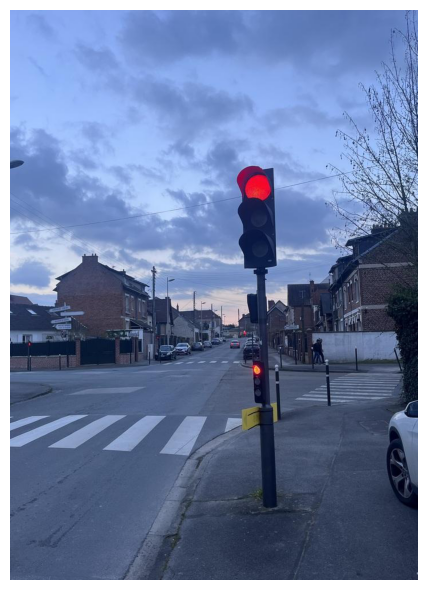

Prédictions filtrées :
Annotations chargées :
    x1   y1   x2   y2   label
0  395  272  469  454  frouge
1  422  613  451  691  frouge
Correspondances trouvées :


In [19]:
import pandas as pd

def load_csv_annotations(csv_path):
    # Charger le fichier CSV contenant les annotations
    df = pd.read_csv(csv_path, header=None)
    df.columns = ['x1', 'y1', 'x2', 'y2', 'label']
    return df

def compare_predictions_with_annotations(predictions, annotations, margin=50):
    matches = []
    for pred in predictions:
        label_pred, conf, coords = pred
        x1_pred, y1_pred = coords[0]
        x2_pred, y2_pred = coords[1]

        for index, row in annotations.iterrows():
            x1_true, y1_true, x2_true, y2_true, label_true = row

            if label_pred == label_true:
                if (x1_true - margin <= x1_pred <= x1_true + margin and
                    y1_true - margin <= y1_pred <= y1_true + margin and
                    x2_true - margin <= x2_pred <= x2_true + margin and
                    y2_true - margin <= y2_pred <= y2_true + margin):
                    matches.append((label_pred, conf, coords))
    return matches

# Chemin de l'image
image_path = 'train/images/0318.jpg'
main(image_path, clf, label_encoder)

# Application de la fonction de filtrage
panneaux_filtrés = filtrer_panneaux(parsed_predictions)
print("Prédictions filtrées :")
for i in panneaux_filtrés:
    print(i)

# Chemin du fichier CSV associé à l'image
csv_path = 'train/labels/0318.csv'
annotations = load_csv_annotations(csv_path)

# Afficher les annotations chargées
print("Annotations chargées :")
print(annotations)

# Comparer les prédictions avec les annotations
matches = compare_predictions_with_annotations(panneaux_filtrés, annotations)

# Afficher les correspondances
print("Correspondances trouvées :")
for match in matches:
    print(match)


## Questions : 
Si on a prédit bien un panneau mais que les coordonnées sont à l'intérieur du vrai panneau ?
On a le droit à 50% de marge d'erreur ou a 50 pixels ?

In [39]:
import os
import pandas as pd

def load_csv_annotations(csv_path):
    try:
        df = pd.read_csv(csv_path, header=None)
        if df.empty:
            raise pd.errors.EmptyDataError
        df.columns = ['x1', 'y1', 'x2', 'y2', 'label']
        return df
    except pd.errors.EmptyDataError:
        return pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2', 'label'])

def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

def compare_predictions_with_annotations(predictions, annotations, iou_threshold=0.5):
    matches = []
    for pred in predictions:
        label_pred, conf, coords = pred
        x1_pred, y1_pred = coords[0]
        x2_pred, y2_pred = coords[1]
        pred_box = (x1_pred, y1_pred, x2_pred, y2_pred)

        for index, row in annotations.iterrows():
            x1_true, y1_true, x2_true, y2_true, label_true = row
            true_box = (x1_true, y1_true, x2_true, y2_true)

            if label_pred == label_true:
                iou = calculate_iou(pred_box, true_box)
                if iou >= iou_threshold:
                    matches.append((label_pred, conf, coords))
    return matches

def calculate_image_accuracy(matches, total_annotations):
    return len(matches) / total_annotations if total_annotations > 0 else 0

# Parcours des images dans le dossier val/images/
image_folder = 'val/images/'
label_folder = 'val/labels/'

total_images = 0
correct_detections = 0

for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg'):
        total_images += 1
        image_path = os.path.join(image_folder, image_file)
        csv_file = image_file.replace('.jpg', '.csv')
        csv_path = os.path.join(label_folder, csv_file)
        
        if not os.path.exists(csv_path):
            continue

        predictions = main(image_path, clf, label_encoder)
        parsed_predictions = [parse_prediction(pred) for pred in predictions]
        
        panneaux_filtrés = filtrer_panneaux(parsed_predictions)
        annotations = load_csv_annotations(csv_path)

        if annotations.empty:
            continue

        matches = compare_predictions_with_annotations(panneaux_filtrés, annotations)

        if matches:
            correct_detections += 1

accuracy = (correct_detections / total_images) * 100 if total_images > 0 else 0

print(f"Total des images : {total_images}")
print(f"Images avec au moins une détection correcte : {correct_detections}")
print(f"Accuracy : {accuracy:.2f}%")


Total des images : 87
Images avec au moins une détection correcte : 38
Accuracy : 43.68%
